In [1]:
pwd()

"/mnt/weird_vol/projects/playaround/Notebooks-Research/Statistics"

In [2]:
DEPOT_PATH

1-element Vector{String}:
 "/mnt/weird_vol/julia/julia-depot"

In [3]:
using Pkg
Pkg.status()

Status `/mnt/weird_vol/projects/playaround/Notebooks-Research/Statistics/Project.toml`
  [31c24e10] Distributions v0.25.108
  [91a5bcdd] Plots v1.40.4


In [4]:
using Distributions
using Plots

# Poisson general info

# Poisson PMF

A poisson PMF is 
$\frac{e^{-\lambda}\lambda^{x}}{x!}$

In [6]:
function pois_pmf(x:: Int, λ:: Number):: Number
    ℯ^(-λ) * λ^(x) / factorial(x)
end

pois_pmf (generic function with 1 method)

## Using the PMF to get the probability of each number of events happening:

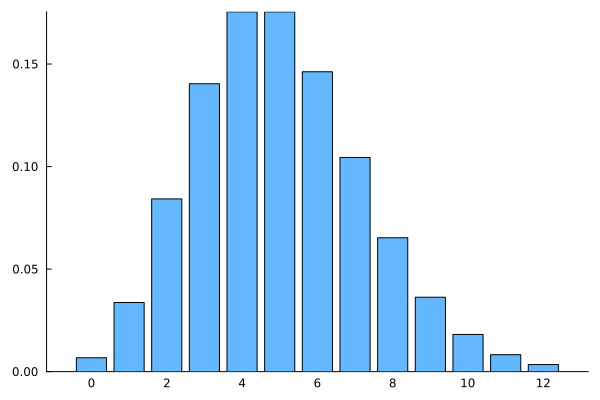

In [40]:
events = [0:12;]
probs = pois_pmf.(events, 5)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

## Using the built-in Poisson function

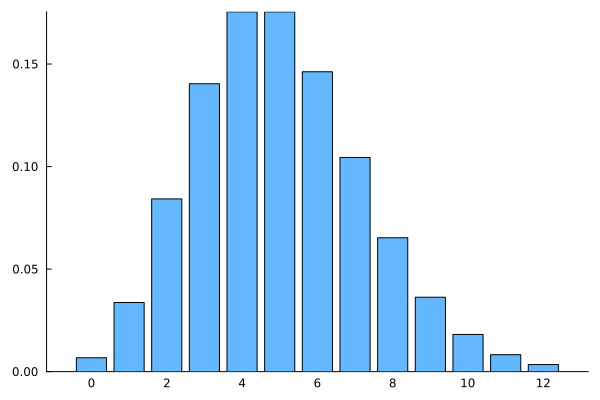

In [44]:
events = [0:12;]
model = Poisson(5)

probs = pdf.(model, events)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

Notes:
- We can see that PMF takes the number events and outputs the probability of that many events happening given the assumed model (here a poisson model)

## Multiple lambdas

In [52]:
lambdas = [1, 3, 5, 10]
models = Poisson.(lambdas)

probs = [pdf.(model, events) for model in models]
probs

4-element Vector{Vector{Float64}}:
 [0.36787944117144233, 0.36787944117144233, 0.18393972058572114, 0.06131324019524039, 0.015328310048810101, 0.00306566200976202, 0.0005109436682936698, 7.299195261338152e-5, 9.123994076672655e-6, 1.0137771196302961e-6, 1.0137771196302985e-7, 9.216155633002698e-9, 7.680129694168931e-10]
 [0.049787068367863944, 0.14936120510359185, 0.22404180765538775, 0.22404180765538775, 0.16803135574154085, 0.10081881344492458, 0.05040940672246224, 0.02160403145248386, 0.008101511794681418, 0.002700503931560474, 0.0008101511794681439, 0.00022095032167312998, 5.523758041828258e-5]
 [0.006737946999085467, 0.03368973499542734, 0.08422433748856832, 0.1403738958142805, 0.17546736976785063, 0.17546736976785068, 0.1462228081398754, 0.10444486295705414, 0.06527803934815854, 0.036265577415643645, 0.018132788707821854, 0.008242176685373562, 0.0034342402855723226]
 [4.5399929762484854e-5, 0.0004539992976248486, 0.0022699964881242435, 0.007566654960414144, 0.018916637401035368, 

In [80]:
reshape(lambdas, 1, 4)

1×4 Matrix{Int64}:
 1  3  5  10

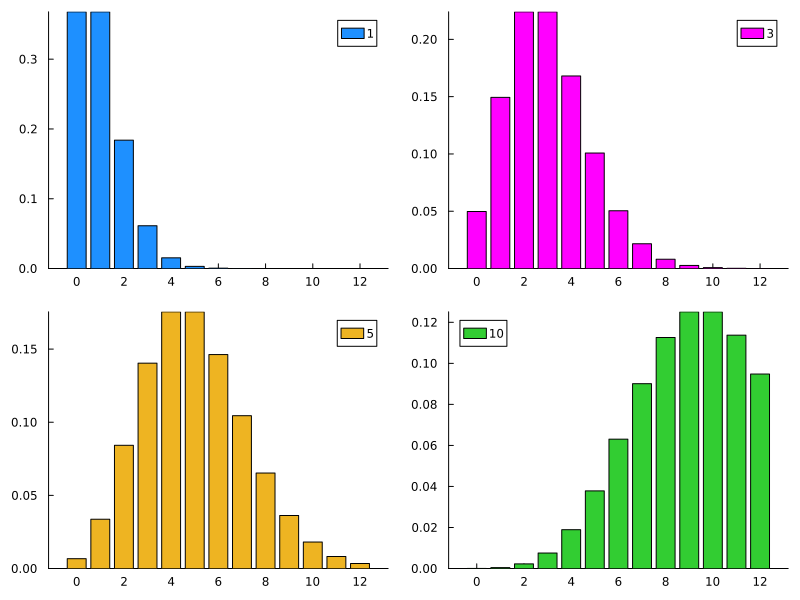

In [106]:
lambdas_mtx = reshape(lambdas, 1, 4)
plot(
    bar(
        events, probs,
        fillcolor=[:dodgerblue :magenta :goldenrod2 :limegreen],
        legend=true,
        grid=false,
        layout=grid(2,2),
        # link=:y,
        label=lambdas_mtx,
        size=(800, 600)
    )
)

Notes:
- Larger lambda makes distribution more symmetric
  - So, when we expect larger number of events, we can also expect a more bell-shaped variance around the mean
  - This is especially, but not only, due to counts/events being >= 0.